In [1]:
import numpy as np
import matplotlib.pyplot as plt

from template_funciones_2 import calcula_L, calcula_lambda, metpot1, deflaciona

In [5]:
A = np.array([
   [0, 1, 1, 1, 0, 0, 0, 0],
   [1, 0, 1, 1, 0, 0, 0, 0],
   [1, 1, 0, 1, 0, 1, 0, 0],
   [1, 1, 1, 0, 1, 0, 0, 0],
   [0, 0, 0, 1, 0, 1, 1, 1],
   [0, 0, 1, 0, 1, 0, 1, 1],
   [0, 0, 0, 0, 1, 1, 0, 1],
   [0, 0, 0, 0, 1, 1, 1, 0]
])
L = calcula_L(A)
L

array([[ 3., -1., -1., -1.,  0.,  0.,  0.,  0.],
       [-1.,  3., -1., -1.,  0.,  0.,  0.,  0.],
       [-1., -1.,  4., -1.,  0., -1.,  0.,  0.],
       [-1., -1., -1.,  4., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  4., -1., -1., -1.],
       [ 0.,  0., -1.,  0., -1.,  4., -1., -1.],
       [ 0.,  0.,  0.,  0., -1., -1.,  3., -1.],
       [ 0.,  0.,  0.,  0., -1., -1., -1.,  3.]])

Para encontrar $\Lambda$ tenemos que encontrar el vector $s^{\Lambda}$ optimo que la minimice. Eso equivale a hallar el autovector asociado al segundo autovalor mas bajo de $L$ 

In [7]:
rows, cols = L.shape
defla_L = L.copy()
for i in range(cols-1):
    avec_i, aval_i, _ = metpot1(defla_L, 1e-12)
    deflA = deflaciona(defla_L, avec_i, aval_i)
avals = np.linalg.eig(L)[0]
print(avals)
print(aval_i, avec_i)
LAMBDA = calcula_lambda(L, avec_i)
print(LAMBDA)
print(round(LAMBDA))
if np.allclose(round(LAMBDA), LAMBDA):
    print(f"cantidad de conexiones entre ambos grupos: {round(LAMBDA)}")

[ 5.23606798e+00  4.00000000e+00 -2.97920468e-16  7.63932023e-01
  4.00000000e+00  6.00000000e+00  4.00000000e+00  4.00000000e+00]
5.999999999981435 [ 1.29587759e-06  1.29587759e-06  4.99997903e-01 -5.00002097e-01
  5.00002097e-01 -4.99997903e-01 -1.29587759e-06 -1.29587759e-06]
1.499999999995359
1


In [ ]:
#Buscamos el autovector asociado al autovalor mas bajo != 0
#Para eso podemos ir haciendo declacion en la matriz a hasta llegar?
rows, cols = A.shape

deflA = A.copy()

for i in range(cols-1):
    avec_i, aval_i, _ = metpot1(deflA, 1e-10)
    deflA = deflaciona(deflA, avec_i, aval_i)

print(avec_i, aval_i)
# print("A, aval: ",np.linalg.eig(A)[0], "\navec: ", np.linalg.eig(A)[1])

avals = np.linalg.eig(A)[0]
avals

[ 0.39411541  0.39409003 -0.3077061  -0.3077061  -0.3077061  -0.3077061
  0.39411216  0.39409328] -0.5615528129320155


array([ 3.56155281e+00,  2.56155281e+00, -1.56155281e+00, -1.00000000e+00,
       -5.61552813e-01, -2.00000000e+00,  2.05561087e-17, -1.00000000e+00])

[0.87331527 0.48715546 0.        ]
[0.59114213 0.5662814  0.57434864]
[0.57735036 0.5773502  0.57735025]
[0.57735027 0.57735027 0.57735027]
[0.57735027 0.57735027 0.57735027]
[0.57735027 0.57735027 0.57735027]
[0.57735027 0.57735027 0.57735027]


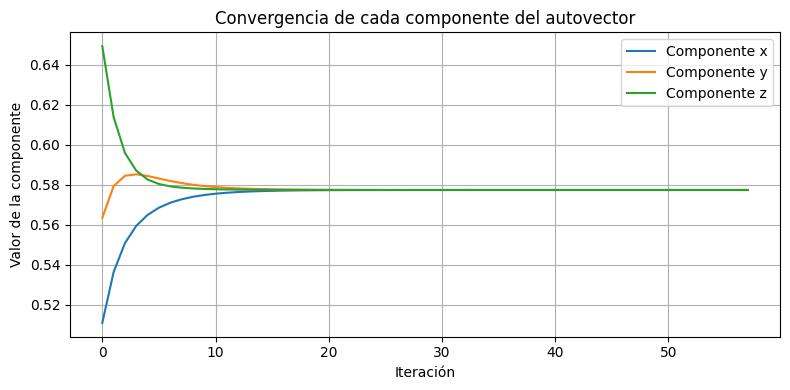

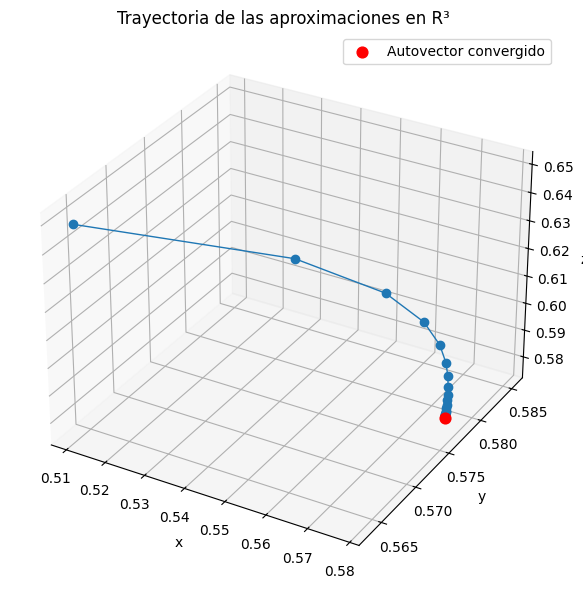

In [4]:
def metpot(A,v,k):
    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
    return v

A = np.array([[0.9, 0.075, 0.025], [0.15, 0.8, 0.05], [0.25, 0.25, 0.5]])
v = np.array([1,0.5,-0.75])

print(metpot(A,v, 1))
print(metpot(A,v, 10))
print(metpot(A,v, 50))
print(metpot(A,v, 100))
print(metpot(A,v, 500))
print(metpot(A,v, 1000))
w = metpot(A,v, 1000)
print(A @ w)
avec, aval, _ = metpot1(A, 1e-10, plot=True)


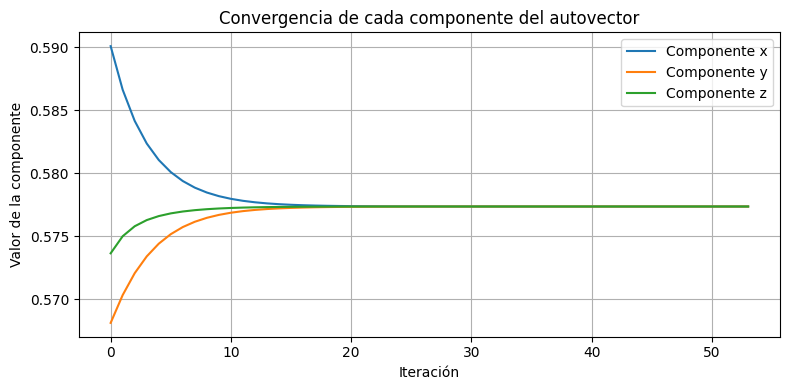

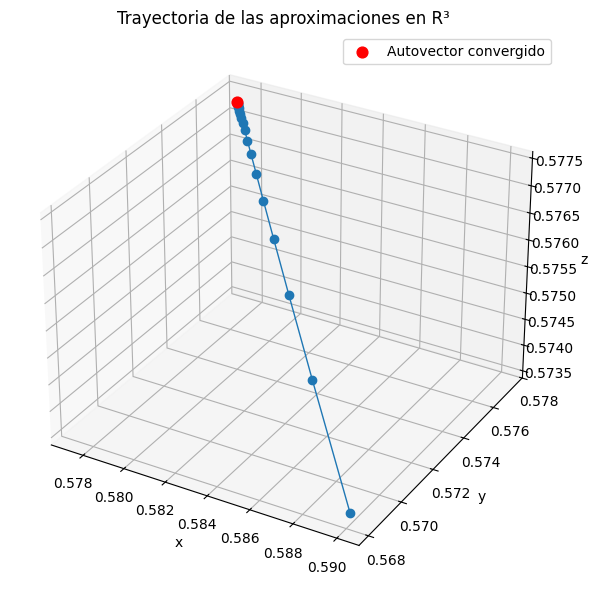

In [12]:
from mpl_toolkits.mplot3d import Axes3D  # sólo para activar el proyector 3D

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(avec_aprox)), avec_aprox[:, 0], label='Componente x')
plt.plot(np.arange(len(avec_aprox)), avec_aprox[:, 1], label='Componente y')
plt.plot(np.arange(len(avec_aprox)), avec_aprox[:, 2], label='Componente z')
plt.xlabel('Iteración')
plt.ylabel('Valor de la componente')
plt.title('Convergencia de cada componente del autovector')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(6, 6))
ax  = fig.add_subplot(111, projection='3d')
ax.plot(avec_aprox[:, 0], avec_aprox[:, 1], avec_aprox[:, 2], marker='o', linewidth=1)
ax.scatter(*avec_aprox[-1], c='red', s=60, label='Autovector convergido')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Trayectoria de las aproximaciones en R³')
ax.legend()
plt.tight_layout()
plt.show()